<a href="https://colab.research.google.com/github/vkvinay0627/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike-Sharing-Demand-Prediction---Capstone-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Libraries**


Install Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import *
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
from scipy import signal
from matplotlib import *
from pandas import DataFrame
import datetime as dt
import os
from pandas import DataFrame
from ipywidgets import interact, interactive, fixed, interact_manual 
plt.style.use('fivethirtyeight')
from google.colab import files

import datetime as dt
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual,HBox,fixed
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1=pd.read_csv("/content/drive/MyDrive/Almabetter/SeoulBikeData.csv", encoding= 'unicode_escape')
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# statistical info
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
# datatype info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# unique values
df1.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#**Pre-processing**

In [8]:
# check for null values
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
df = df1.copy()

In [12]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [13]:
df['day'] = df['Date'].dt.day
df['month_name'] = df['Date'].dt.month_name()
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.day_name()
# df['weekday_num'] = df['Date'].dt.weekday
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


In [14]:
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month_name                     12
month                          12
weekday                         7
dtype: int64

In [15]:
df= df.rename(columns={'Temperature(°C)':'Temp',
                       'Wind speed (m/s)':'Windspeed',
                       'Humidity(%)':'humidity',
                       'Rainfall(mm)' : 'Rainfall'})
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


In [ ]:
# # change int columns to category
# cols = ['Seasons','month','hour','holiday','weekday','workingday','weather']

# for col in cols:
#     df[col] = df[col].astype('category')
# df.info()

#**Exploratory Data Analysis**

##Uni-variate Analysis

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


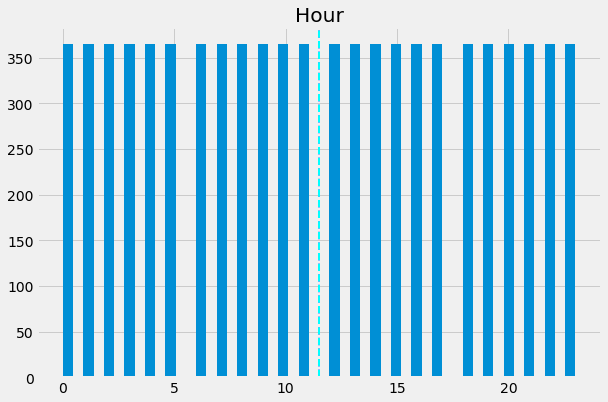

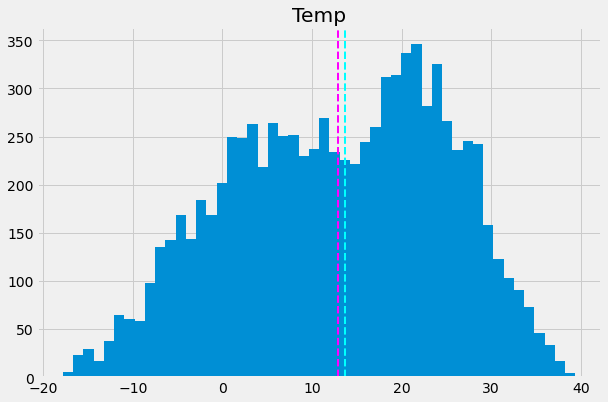

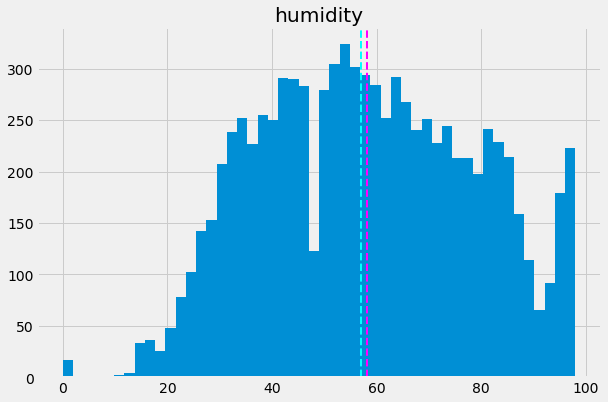

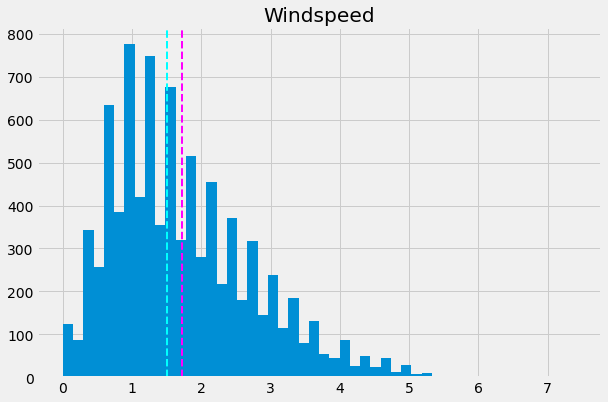

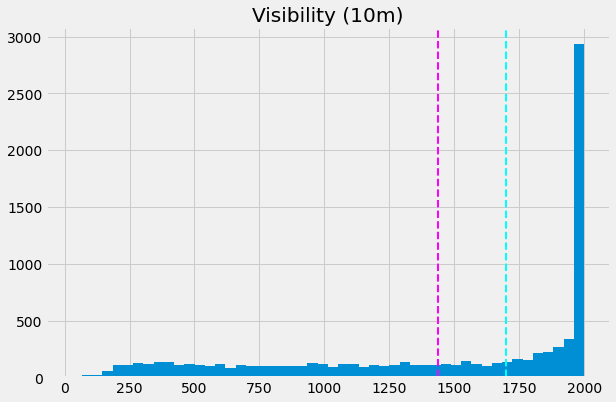

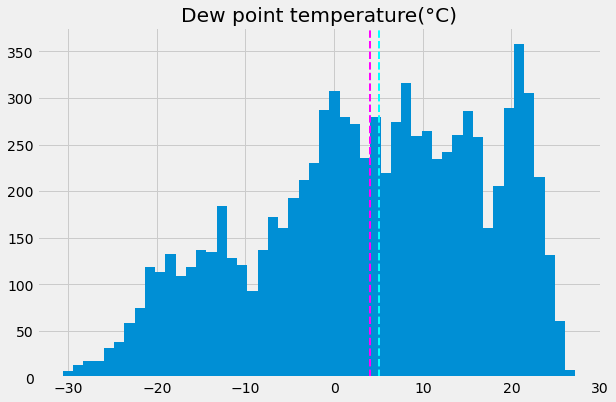

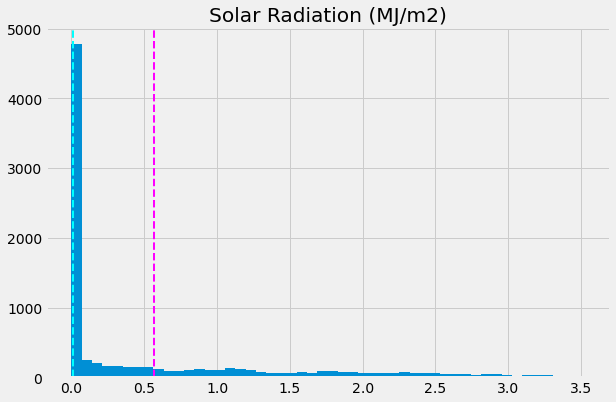

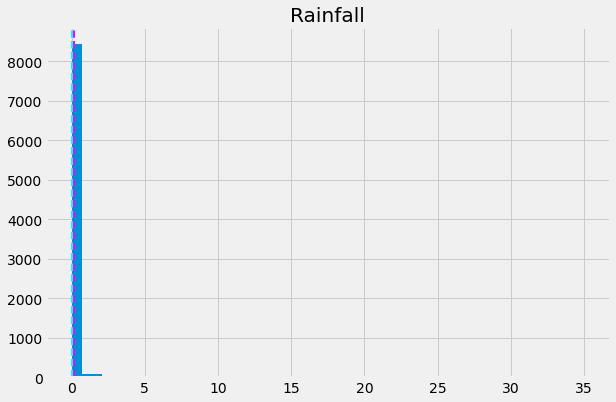

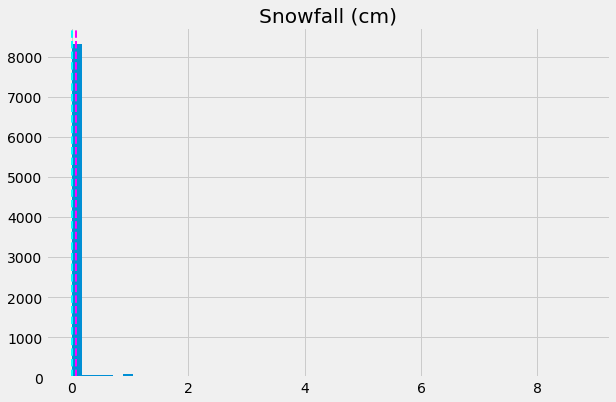

In [17]:
numeric_features = df.iloc[:,[2,3,4,5,6,7,8,9,10]]
numeric_features.head()
# numeric_features[:].head()
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [18]:
df.head()

,Date,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


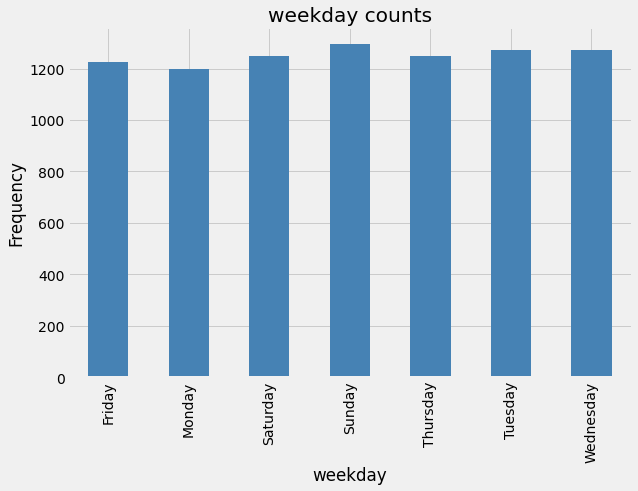

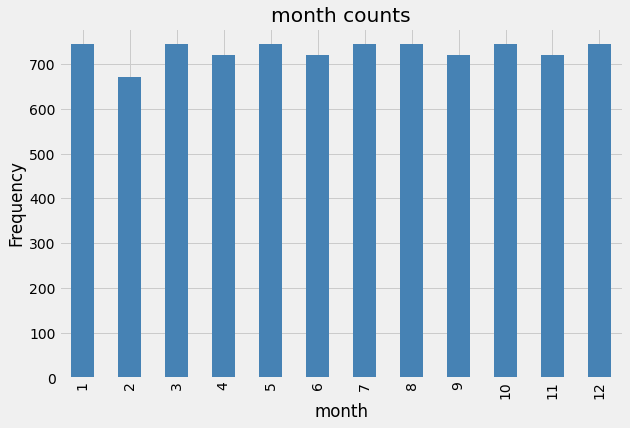

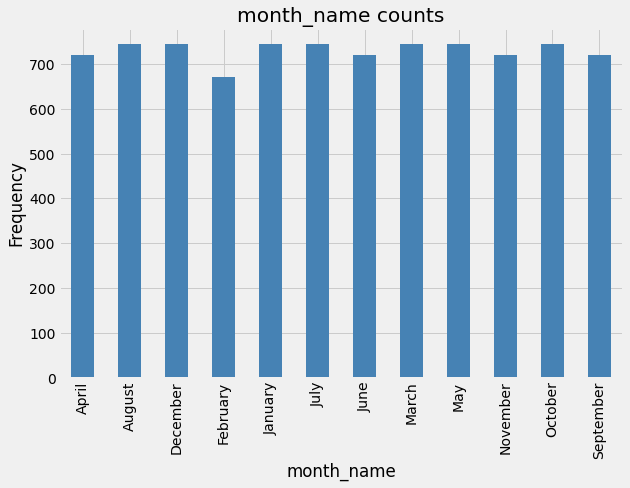

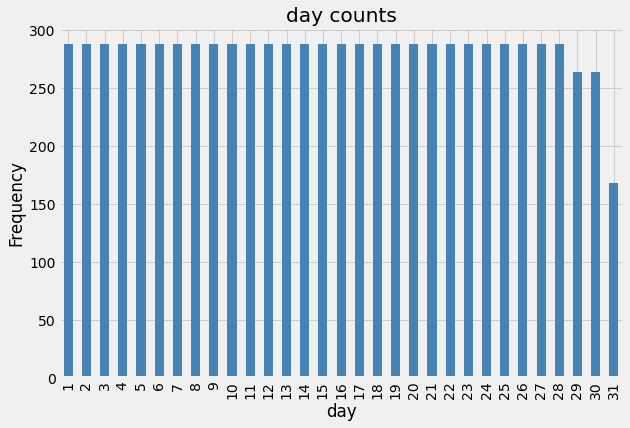

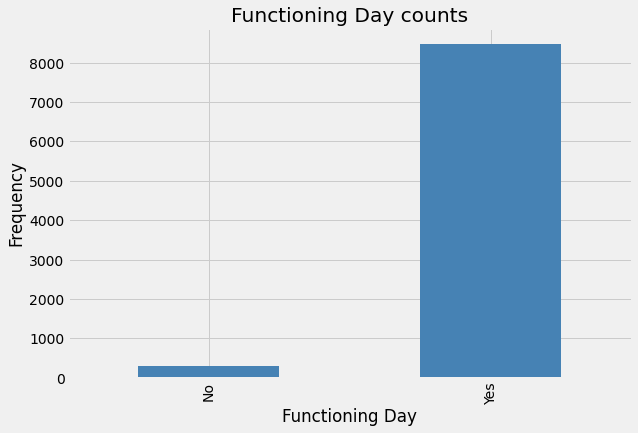

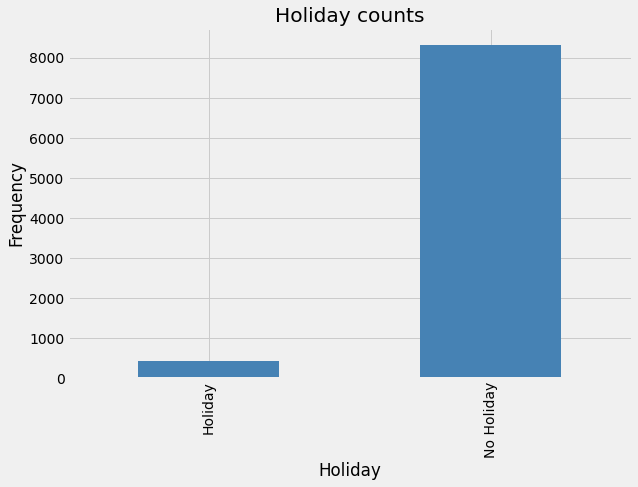

In [19]:
categorical_features = df.iloc[:,[-1,-2,-3,-4,-5,-6]]
categorical_features.head()
# numeric_features[:].head()

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##**Bi-variate and Multi-variate Analysis**

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='weekday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

In [ ]:
holiday=df['Holiday'].value_counts()
ax=sns.barplot(x=holiday.index,y=(holiday/holiday.sum())*100)
ax.set(xlabel='Holiday', ylabel="%")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='month', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='weekday', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

In [ ]:
df.info()

In [ ]:
# # can also be visulaized using histograms for all the continuous variables.
# fig,axes=plt.subplots(2,2)
# axes[0,0].hist(x="Temp",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[0,0].set_title("Variation of temp(Celcius)")
# axes[0,1].hist(x="Rainfall",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[0,1].set_title("Variation of Rainfall(mm)")
# axes[1,0].hist(x="Windspeed",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[1,0].set_title("Variation of windspeed(m/s)")
# axes[1,1].hist(x="humidity",data=df_copy,edgecolor="black",linewidth=2,color='#ff4125')
# axes[1,1].set_title("Variation of humidity(%)")
# fig.set_size_inches(10,10)

#**Feature Engineering**

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [ ]:
df.info()

In [ ]:
drop_column = ['Date','Dew point temperature(°C)','month','humidity','month','weekday']
df = df.drop(drop_column,1)

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

In [ ]:
# One hot encoding
df = pd.get_dummies(df_copy, columns=['Seasons','Holiday','Functioning Day','month_name','day'], prefix=["Seasons","holiday","Functioning_Day","month","day"],drop_first=True)
df.head()


In [ ]:
# df_copy = df_copy.drop(['month'], axis = 1)

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']))
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])

#**Test** **Train** **Split**

In [ ]:
X = df.drop(['Rented Bike Count'], axis = 1)
y = df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)


# **Model Training**

In [ ]:
# Model : LinearRegression

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Model : LinearRegression")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Model : DecisionTreeRegressor")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Model : XGBRegressor")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Model : RandomForestRegressor")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
df_copy.describe()

# **Hyperparamter** **Tuning**

In [ ]:
rf_h = RandomForestRegressor()
params={

    "n_estimators":[50,100,200,300,400,500,600,700,800,900,1000]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
rf_h_regressor=GridSearchCV(rf_h,param_grid=params,n_jobs=-1)
rf_h_regressor.fit(X_train, y_train)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_
y_pred = rf_h_regressor.predict(X_test)
print("Model : RandomForestRegressor Gridsearch")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MAE=mean_absolute_error(y_test, y_pred_lasso)
MAE=MAE**2
print("MAE :" , MAE)

SE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Ridge 

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **Elastic Net**

In [ ]:
# from sklearn.linear_model import ElasticNet
# #a * L1 + b * L2
# #alpha = a + b and l1_ratio = a / (a + b)
# elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# elasticnet.fit(X_train,y_train)

In [ ]:
# elasticnet.score(X_train, y_train)

In [ ]:
# y_pred_en = elasticnet.predict(X_test)

In [ ]:
# MSE  = mean_squared_error((y_test), (y_pred_en))
# print("MSE :" , MSE)

# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)

# r2 = r2_score((y_test), (y_pred_en))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# elastic = ElasticNet()
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
# elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
# elastic_regressor.fit(X_train, y_train)

In [ ]:
# print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
# print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
# y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
# MSE  = mean_squared_error((y_test), (y_pred_elastic))
# print("MSE :" , MSE)

# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)

# r2 = r2_score((y_test), (y_pred_elastic))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# plt.figure(figsize=(8,5))
# plt.plot((y_pred_elastic))
# plt.plot((np.array(y_test)))
# plt.legend(["Predicted","Actual"])
# plt.show()

In [ ]:
# trip duration ko normal distribution meoin convert karne ke lie square root use kr log nhi
##Itne sare dummy variables mat bana, continuous mein hi rkhke ek baar cghala ke dekh month ,hour wale columns ko.
#Linear regression mein hi acha krne ka try kr phir doosre model lagaio
#Trip duration ko log mein kyu kia hai tune? normal chala ke dekh


In [ ]:
# #XGBoost code
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # split data into train and test sets
# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# # fit model no training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dtr = RandomForestRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Model : RandomForestRegressor")

from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("-"*50)


# rf_h = RandomForestRegressor()
# parameters = {'n_estimators':[50,100,200,300,400,500]}
# rf_h_regressor = GridSearchCV(rf_h, param_grid = parameters, scoring = 'neg_mean_squared_error', cv=5)
# rf_h_regressor.fit(X_train, y_train)

# y_pred = rf_h_regressor.predict(X_test)
# print("Model : RandomForestRegressor_Gridsearch")

# from sklearn.metrics import mean_absolute_error
# MAE=mean_absolute_error(y_test, y_pred)
# MAE=MAE**2
# print("MAE :" , MAE)

# from sklearn.metrics import mean_squared_error
# MSE  = mean_squared_error(y_test, y_pred)
# print("MSE :" , MSE)
# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)

# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_test)

print("Model : DecisionTreeRegressor")

from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# dtr_h = DecisionTreeRegressor()
# parameters = {"criterion": ["mse", "mae"],
#               "min_samples_split": [10, 20, 40],
#               "max_depth": [2, 6, 8],
#               "min_samples_leaf": [20, 40, 100],
#               "max_leaf_nodes": [5, 20, 100],
#               }
# dtr_h_regressor = GridSearchCV(dtr_h, param_grid = parameters, scoring = 'neg_mean_squared_error', cv=5)
# dtr_h_regressor.fit(X_train, y_train)

# y_pred = dtr_h_regressor.predict(X_test)

# from sklearn.metrics import mean_absolute_error
# MAE=mean_absolute_error(y_test, y_pred)
# MAE=MAE**2
# print("MAE :" , MAE)

# MSE  = mean_squared_error((y_test), (y_pred))
# print("MSE :" , MSE)

# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)

# r2 = r2_score((y_test), (y_pred))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# plt.figure(figsize=(8,5))
# plt.plot(y_pred)
# plt.plot(np.array(y_test))
# plt.legend(["Predicted","Actual"])
# plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# xgb_h = XGBRegressor()
# parameters = {
#     "learning_rate":[0.05,0.10,0.15,0.2,0.25,0.3],
#     "max_depth":[1,4,6,8,10,15] ,
#     "min_child_weight":[1,3,5,7] ,
#     "gamma":[0.1,0.2,0.3,0.4] ,
#     "n_estimators":[100,200,300,400,500]
# }
# xgb_h_regressor = GridSearchCV(xgb_h, param_grid = parameters, scoring = 'neg_mean_squared_error', cv=5)
# xgb_h_regressor.fit(X_train, y_train)

# # print("The best fit n_estimators value is found out to be :" ,xgb_h_regressor.parameters)
# # print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# y_pred = xgb_h_regressor.predict(X_test)

# MSE  = mean_squared_error((y_test), (y_pred))
# print("MSE :" , MSE)

# RMSE = np.sqrt(MSE)
# print("RMSE :" ,RMSE)

# r2 = r2_score((y_test), (y_pred))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

#e

In [ ]:
# #regression
# from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# #evaluation metrics
# from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [ ]:
# models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
# model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
# rmsle=[]
# d={}
# for model in range (len(models)):
#     clf=models[model]
#     clf.fit(X_train,y_train)
#     test_pred=clf.predict(X_test)
#     rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
# d={'Modelling Algo':model_names,'RMSLE':rmsle}   
# d

In [ ]:
# #for random forest regresion.
# from sklearn.model_selection import GridSearchCV
# no_of_test=[500]
# params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
# clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
# clf_rf.fit(x_train,y_train)
# pred=clf_rf.predict(X_test)
# print((np.sqrt(mean_squared_log_error(pred,y_test))))

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Model : RandomForestRegressor")

from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
rf_h = RandomForestRegressor()
params={

    "n_estimators":[50,100,200,300,400,500]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
rf_h_regressor=GridSearchCV(rf_h,param_grid=params,n_jobs=-1)
rf_h_regressor.fit(X_train, y_train)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_
y_pred = rf_h_regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
